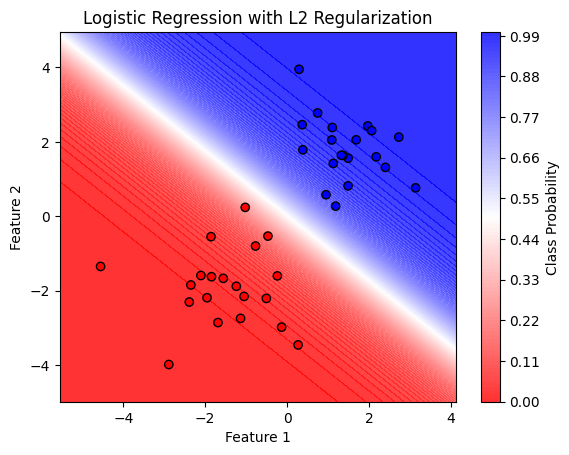

In [ ]:
# CS771 (Autumn 2023)
# logistic regression model (with L2 regularization on weights) learned using gradient descent
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap  # Add this import

# Generate synthetic data

np.random.seed(0)
X = np.vstack([np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]])
y = np.hstack([np.zeros(20), np.ones(20)])

# Add a column of ones for the bias term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Define logistic regression functions
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def logistic_regression(X, y, eta, num_iterations, lambda_reg):
    N,D = X.shape
    w = np.zeros(D)
    for _ in range(num_iterations):
        h = sigmoid(np.dot(X, w))
        gradient = (1/N) * (np.dot(X.T, (h - y)) + lambda_reg * w)
        w -= eta * gradient
    return w

# Train logistic regression with L2 regularization
eta = 0.01
num_iterations = 1000
lambda_reg = 1.0

w = logistic_regression(X, y, eta, num_iterations, lambda_reg)

# Create a colormap for smooth color transition
colors = [(1, 0, 0), (1, 1, 1), (0, 0, 1)]  # Red - White - Blue
n_bins = 100  # Number of bins in the colormap
cmap_name = "custom_colormap"
cm = LinearSegmentedColormap.from_list(cmap_name, colors, N=n_bins)


# Plot the decision boundary and probability contours
x_min, x_max = X[:, 1].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 2].min() - 1, X[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = sigmoid(np.dot(np.c_[np.ones(xx.ravel().shape), xx.ravel(), yy.ravel()], w))
Z = Z.reshape(xx.shape)

# Create contour plot with custom colormap
contour = plt.contourf(xx, yy, Z, cmap=cm, alpha=0.8, levels=np.linspace(0, 1, 101))

# Also plot the data points
plt.scatter(X[:, 1], X[:, 2], c=y, cmap=cm, edgecolors='k', linewidths=1)

# Add colorbar
cbar = plt.colorbar(contour)
cbar.set_label('Class Probability')

# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression with L2 Regularization')

plt.show()